In [6]:
import pandas as pd
import numpy as np
import random
import tensorflow.keras as keras
import matplotlib.pyplot as plt

train = pd.read_csv('Data_Set/sign_mnist_train.csv')
test = pd.read_csv('Data_Set/sign_mnist_test.csv')

train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype = 'float32')

Label for the image/sign is: H


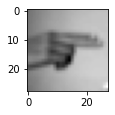

In [57]:
# List of alphabets according to the numbers assigned inside the labels, 0 for A, 1 for B and so on
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

# this is to generate a number between 1 and the total number of rows that exist in the training set
# basically load an image data from all the images available in csv format 
i = random.randint(1, train.shape[0])
fig1, ax1 = plt.subplots(figsize = (2, 2))
plt.imshow(train_data[i, 1:].reshape((28, 28)), cmap = 'gray')
print("Label for the image/sign is:", class_names[int(train_data[i, 0])])
